In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
import seaborn as sns



In [2]:
df_hotel=pd.read_csv("hotel_bookings.csv", skiprows=0, header=0)
print(df_hotel.shape)
print(df_hotel.columns) #print all columns
print(df_hotel.info()) # print column types
df_hotel.head()

(119390, 32)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
print(df_hotel.isna().sum()) # check for null values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [4]:
#scrub the data (has Nan to children,company,agent,country)

#-- Company (column) values are very much spread out without patterns. so can drop this column?
#-- agent (column) values are very much spread out without patterns. so can drop this column?
#-- drop agent,company
# fill median values to missing children
# drop rows with Nan values for country

df_hotel=df_hotel.drop(['agent','company'],axis=1)
df_hotel['children'].fillna(df_hotel['children'].median(),inplace=True)
df_hotel=df_hotel.dropna(subset=["country"]) 
df_hotel.isna().sum()

df_hotel.shape


(118902, 30)

In [5]:
##delete the rows with rows<1000 for countries
#print(len(df_hotel.country.unique()))
#print(df_hotel.country.unique())
#print(df_hotel.reserved_room_type.unique())
 
#print(df_hotel["country"].value_counts().sort_values().tail(20)) 

#filter only data of countries , which has atleast 1000 recods
cntry_list = ['SWE','AUT','CN','CHE','USA','NLD','BRA','BEL','IRL','ITA','DEU','ESP','FRA','GBR','PRT']

#df_hotel1 = df_hotel[df_hotel['country'].str.contains(cntry_list[])]

#df_hotel1 = df_hotel[df_hotel['country'] in cntry_list]


In [6]:
#create month-date column
month={'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12', }

df_hotel['mth']=df_hotel['arrival_date_month'].map(month)
df_hotel['date'] = df_hotel.arrival_date_day_of_month.map("{:02}".format)
df_hotel['mdt_arrival']=df_hotel['mth']+df_hotel['date'] 
df_hotel=df_hotel.drop(['mth','date'],axis=1)
print(df_hotel.shape)
#df_hotel.info()
df_hotel.head(5)



(118902, 31)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,mdt_arrival
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0701
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0701
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0701
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0701
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,0701


In [7]:
#Drop unwanted columns

#df_hotel[['arrival_date_month','arrival_date_day_of_month','mdt_arrival']]

df_hotel=df_hotel.drop(['is_canceled','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','meal','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','deposit_type','days_in_waiting_list','total_of_special_requests','reservation_status','reservation_status_date','distribution_channel','country','assigned_room_type'],axis=1)

In [8]:
#Convert datatypes
df_hotel['mdt_arrival']=df_hotel['mdt_arrival'].map(lambda x: int(x)) # conver string to Int values

In [9]:
#df_hotel.isna().sum()
df_hotel.shape

(118902, 13)

In [10]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 13 columns):
hotel                          118902 non-null object
lead_time                      118902 non-null int64
stays_in_weekend_nights        118902 non-null int64
stays_in_week_nights           118902 non-null int64
adults                         118902 non-null int64
children                       118902 non-null float64
babies                         118902 non-null int64
market_segment                 118902 non-null object
reserved_room_type             118902 non-null object
customer_type                  118902 non-null object
adr                            118902 non-null float64
required_car_parking_spaces    118902 non-null int64
mdt_arrival                    118902 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 12.7+ MB


(118902, 13)
(118902, 24)
<class 'scipy.sparse.csr.csr_matrix'>
(118902, 9)


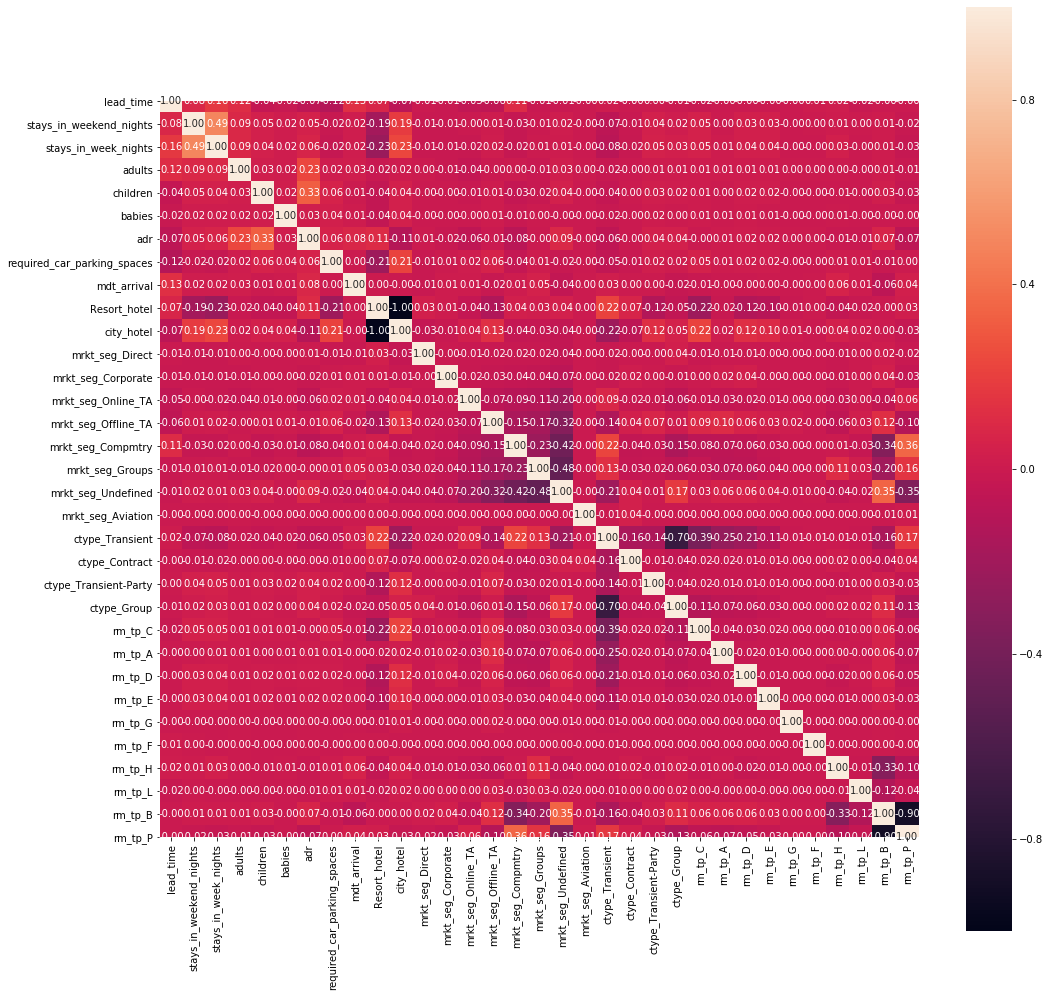

In [11]:
#df_hotel.hotel.unique()

#Build a pipeline for normalizer,OneHotEncoder

df_hotel_numeric=["lead_time","stays_in_weekend_nights",'stays_in_week_nights','adults','children','babies','adr','required_car_parking_spaces','mdt_arrival'] 
print(df_hotel.shape)
#print(df_hotel_numeric.shape)
num_pipeline = Pipeline([
        ('normalizer', MinMaxScaler())
    ])
num_attribs = list(df_hotel_numeric) # list all the numeric features
cat_attribs = ["hotel","market_segment","reserved_room_type","customer_type"]
full_pipeline = ColumnTransformer([
       # ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

hotel_prepared = full_pipeline.fit_transform(df_hotel)
print(hotel_prepared.shape)
print(type(hotel_prepared))



#print(df_hotel_prepared.head())
cols=['Resort_hotel','city_hotel','mrkt_seg_Direct','mrkt_seg_Corporate','mrkt_seg_Online_TA','mrkt_seg_Offline_TA',
      'mrkt_seg_Compmtry', 'mrkt_seg_Groups', 'mrkt_seg_Undefined', 'mrkt_seg_Aviation','ctype_Transient', 'ctype_Contract', 
      'ctype_Transient-Party', 'ctype_Group','rm_tp_C', 'rm_tp_A','rm_tp_D','rm_tp_E','rm_tp_G','rm_tp_F','rm_tp_H',
      'rm_tp_L','rm_tp_B','rm_tp_P']

df_hotel_prepared=pd.DataFrame(hotel_prepared.toarray(),columns=cols)

df_hotel=df_hotel.drop(['hotel','market_segment','reserved_room_type','customer_type'],axis=1)
df_hotel_feature=pd.concat([df_hotel,df_hotel_prepared],axis=1)
print(df_hotel.shape)
plt.figure(figsize=(17,17))
sns.heatmap(df_hotel_feature.corr(),cbar=True, annot=True, square=True, fmt='.2f')
plt.show()




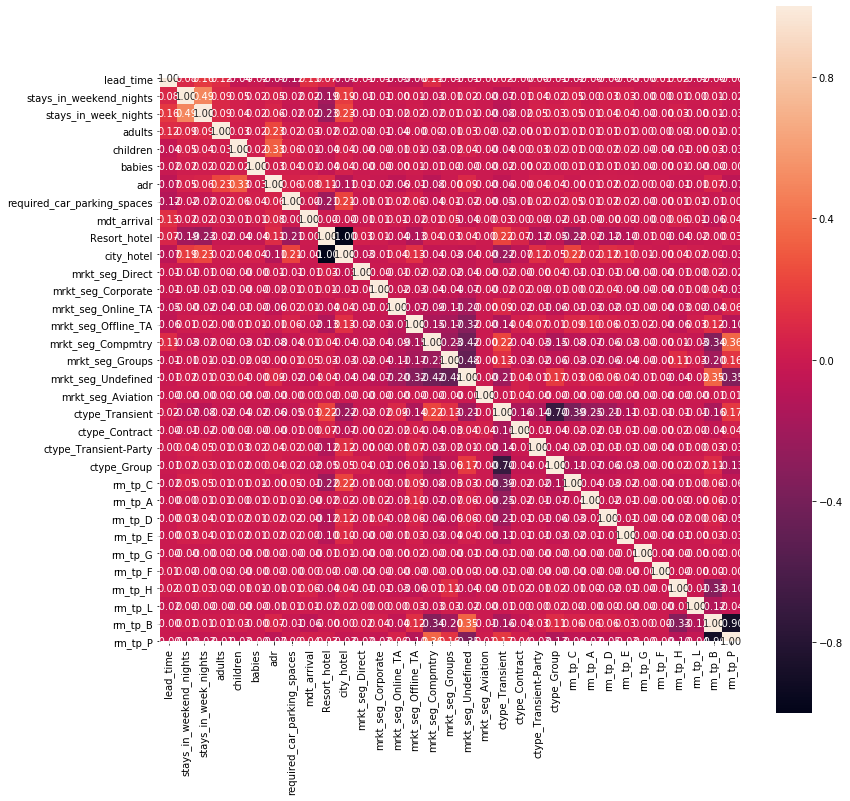

In [12]:
plt.figure(figsize=(13,13))
sns.heatmap(df_hotel_feature.corr(),cbar=True, annot=True, square=True, fmt='.2f')
plt.show()


In [13]:
df_hotel_feature.corr()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,adr,required_car_parking_spaces,mdt_arrival,Resort_hotel,...,rm_tp_C,rm_tp_A,rm_tp_D,rm_tp_E,rm_tp_G,rm_tp_F,rm_tp_H,rm_tp_L,rm_tp_B,rm_tp_P
lead_time,1.000000,0.083988,0.164783,0.116773,-0.038326,-0.021146,-0.066332,-0.115551,0.131348,0.071108,...,-0.017726,-0.002612,-0.001498,-0.002638,-0.004644,0.014023,0.019039,-0.020194,-0.004027,-0.000813
stays_in_weekend_nights,0.083988,1.000000,0.494890,0.090392,0.045431,0.018397,0.047319,-0.018145,0.017355,-0.185253,...,0.050954,0.003309,0.034583,0.032178,-0.000840,0.004416,0.009801,0.001995,0.014316,-0.019902
stays_in_week_nights,0.164783,0.494890,1.000000,0.091991,0.044260,0.020157,0.063647,-0.024376,0.017806,-0.231986,...,0.052720,0.010001,0.036234,0.036079,-0.001716,-0.003247,0.033730,-0.002880,0.014689,-0.030152
adults,0.116773,0.090392,0.091991,1.000000,0.029584,0.017884,0.227431,0.016364,0.027952,-0.015021,...,0.014783,0.009724,0.008191,0.008197,0.001589,0.001005,0.004061,-0.004890,0.008828,-0.010356
children,-0.038326,0.045431,0.044260,0.029584,1.000000,0.024131,0.325033,0.057063,0.005816,-0.042743,...,0.014613,0.003326,0.022761,0.015686,-0.001695,-0.001072,-0.005043,-0.000853,0.029795,-0.029226
babies,-0.021146,0.018397,0.020157,0.017884,0.024131,1.000000,0.028594,0.036971,0.009822,-0.041871,...,0.010914,0.006773,0.008889,0.006371,-0.000531,-0.000336,0.005510,-0.000628,-0.001140,-0.001142
adr,-0.066332,0.047319,0.063647,0.227431,0.325033,0.028594,1.000000,0.058063,0.079660,0.106925,...,-0.001170,0.012031,0.022247,0.015330,0.002207,0.000877,-0.011323,-0.013469,0.069629,-0.066570
required_car_parking_spaces,-0.115551,-0.018145,-0.024376,0.016364,0.057063,0.036971,0.058063,1.000000,0.000341,-0.213856,...,0.048193,0.012832,0.022173,0.016925,-0.001649,-0.001043,0.012051,0.012009,-0.010165,0.003384
mdt_arrival,0.131348,0.017355,0.017806,0.027952,0.005816,0.009822,0.079660,0.000341,1.000000,0.003842,...,-0.013446,-0.001620,-0.002272,0.000327,-0.000438,0.000779,0.061435,0.011941,-0.063666,0.038141
Resort_hotel,0.071108,-0.185253,-0.231986,-0.015021,-0.042743,-0.041871,0.106925,-0.213856,0.003842,1.000000,...,-0.218308,-0.015828,-0.123145,-0.100872,-0.010054,0.002898,-0.041059,-0.022783,-0.003949,0.026360


In [ ]:
pd.plotting.scatter_matrix(df_hotel_feature, alpha=0.4);

In [ ]:
pd.plotting.boxplot(df_hotel_feature);